In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

Accuracy: 0.97


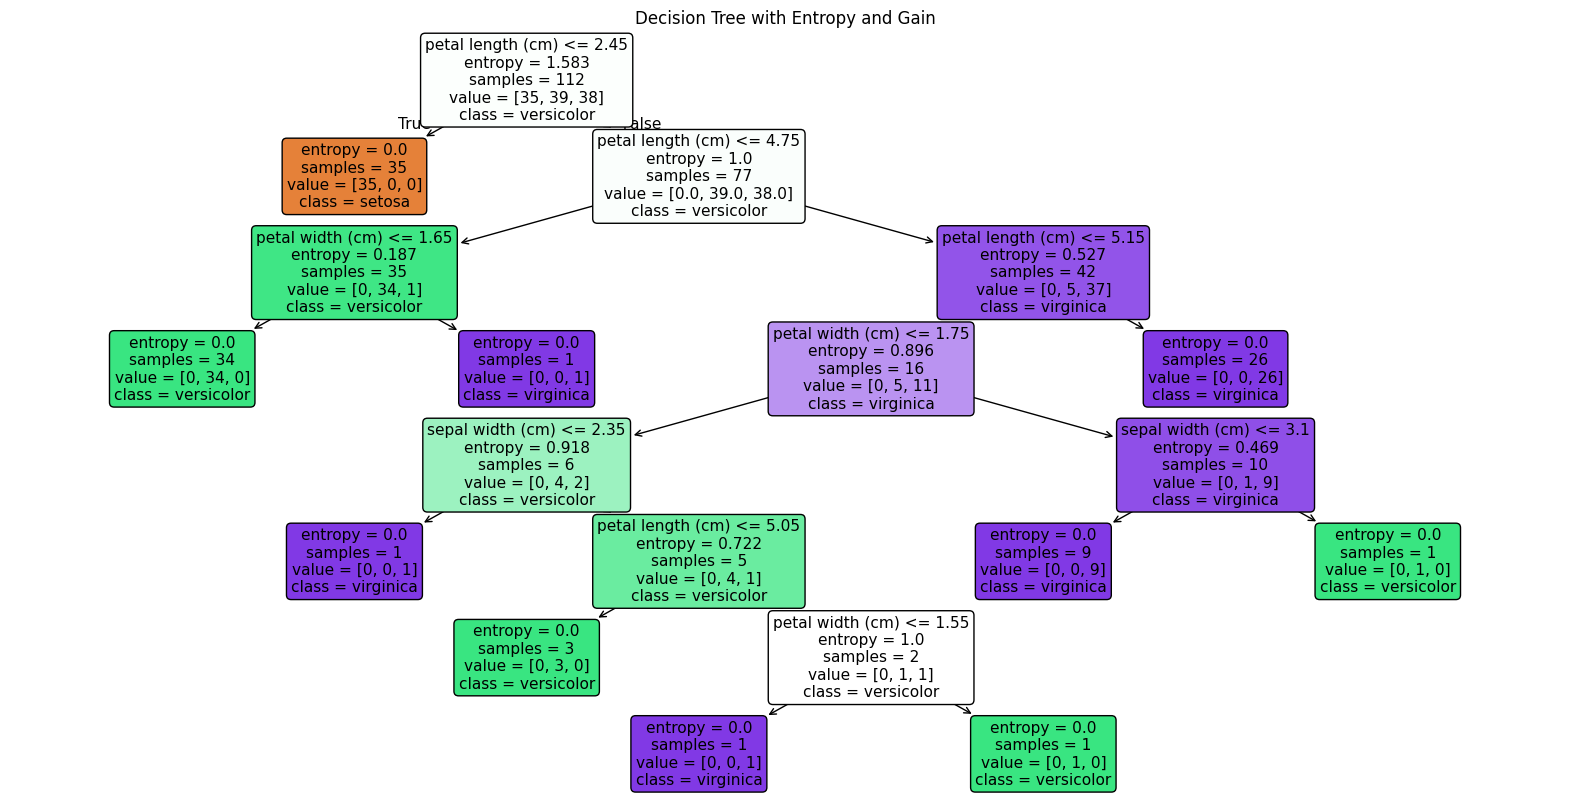

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    impurity=True,  # Show entropy
    rounded=True
)
plt.title("Decision Tree with Entropy and Gain")
plt.show()

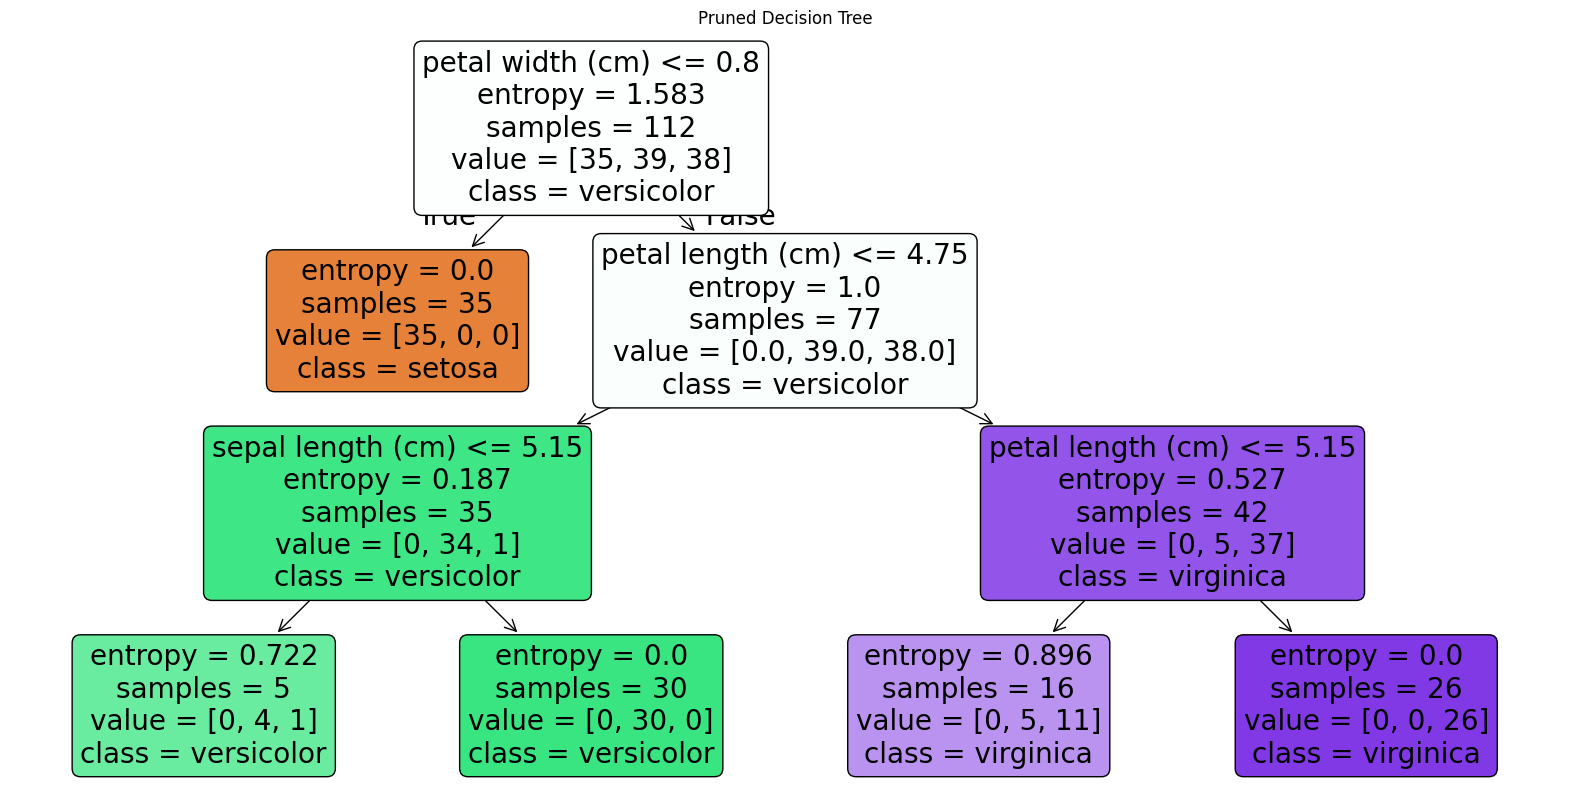

Pruned Tree Accuracy: 0.97


In [11]:
# Pruned Tree
pruned_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=5)
pruned_clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(
    pruned_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    impurity=True,
    rounded=True
)
plt.title("Pruned Decision Tree")
plt.show()

print(f"Pruned Tree Accuracy: {pruned_clf.score(X_test, y_test):.2f}")
